In [2]:
"""Load Libraries
This code loads the necessary libraries required to perform the analysis
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
"""Load Data
This code loads the dataset from the Final Project Data 1200 folder and the head function displays the top 5 rows of the data set
"""
studentperf = pd.read_csv('..\FINAL PROJECT DATA 1200/studentperf.csv')
studentperf.head()

,Method,satis,time,ability,prvperf,Outcome
0,1,5,22,13,26.5,1
1,1,4,12,27,19.6,0
2,1,2,22,18,26.4,1
3,1,5,20,18,25.1,0
4,1,4,22,29,28.0,1


In [4]:
"""Key Statistics
This code provides the summary key statistics for the numerical columns in the dataset 
"""
studentperf.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


<Axes: >

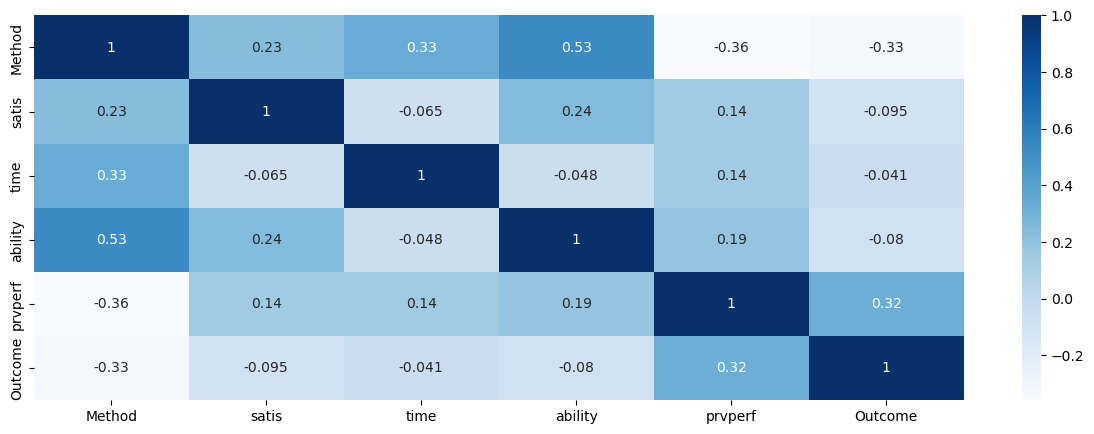

In [5]:
"""Visualization of Correlations
This code create a heatmap visualization of the correlations between the numerical columns in the data. 
This shows the relationship between the variables in the dataset.
A correlation value close to +1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.
Values close to 0 represent a weak or no correlation.
"""
fig = plt.figure(figsize=(15,5))
sns.heatmap(studentperf.corr(),annot=True,cmap="Blues")

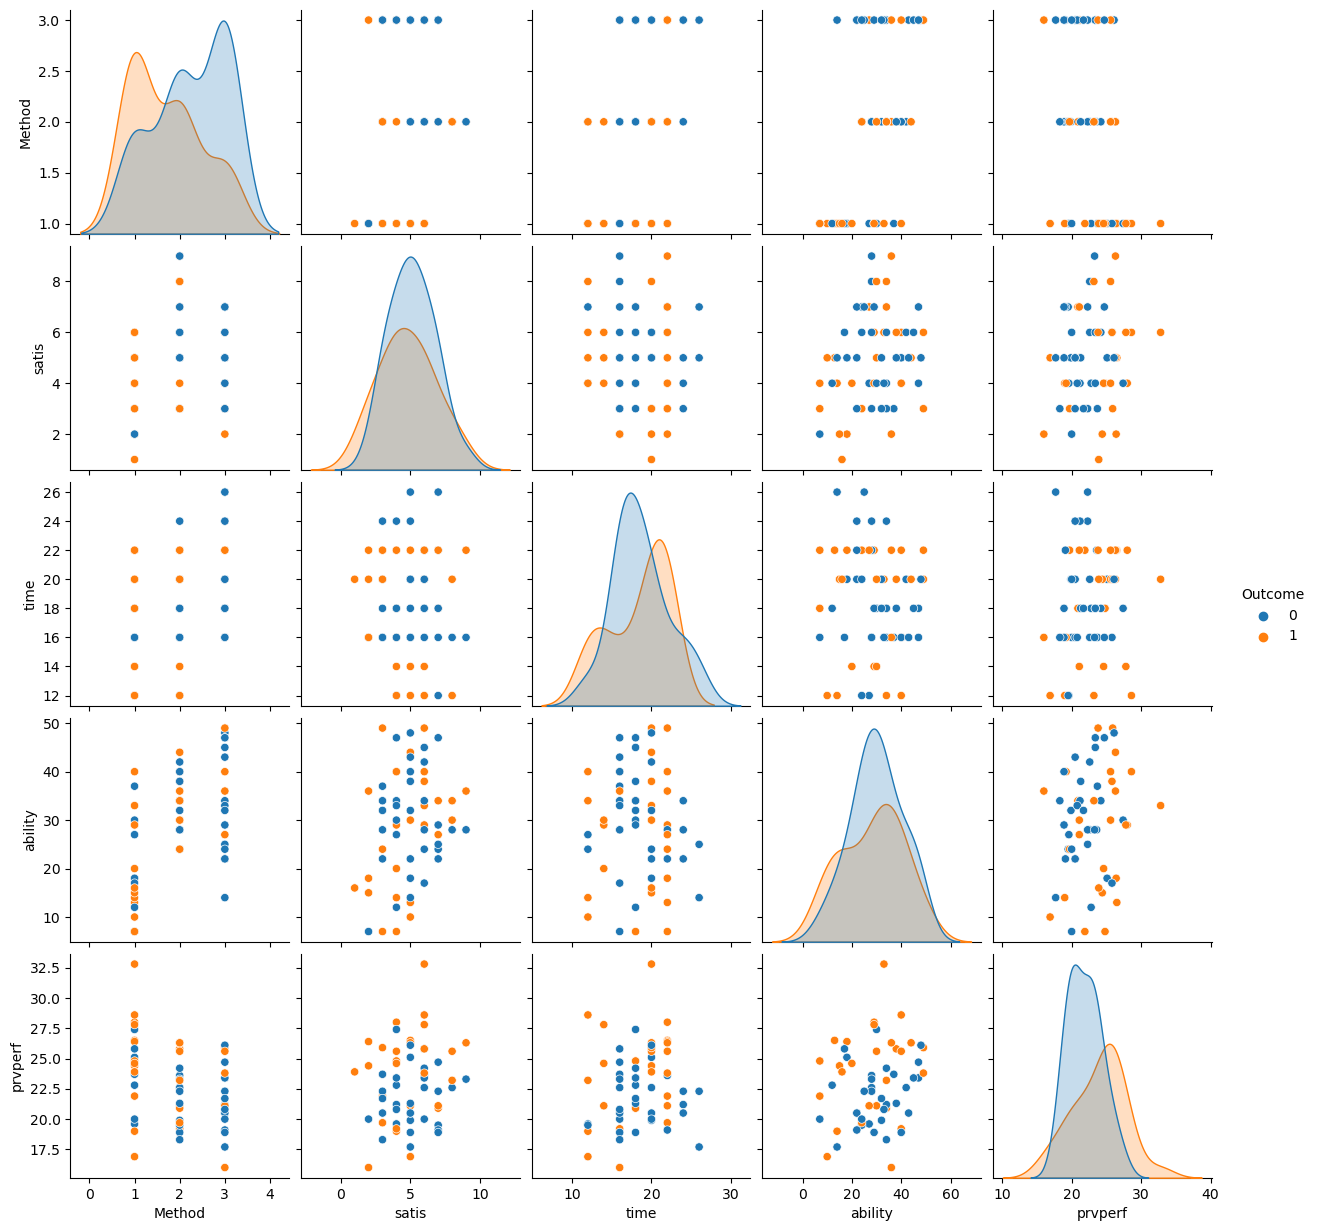

In [6]:
""" Pairplot with hue=Outcomes
This code creates a pair plot creates a grid of scatter plots, where each numerical column is plotted against all other numerical columns.
The scatter plots represent the relationship between two numerical variables. Each point in a scatter plot corresponds to a data point in the dataset
"""
sns.pairplot(studentperf, hue ='Outcome')

In [7]:
"""Create x and y variables
x: This variable corresponds to the input features or independent variables.
We can generate it by removing the 'Outcome' column from the DataFrame called "student perf" using the drop function.
y: On the hand y represents the output variable or dependent variable. We can extract it from the 'Outcome' column of the studentperf DataFrame.
"""
X = studentperf.drop('Outcome',axis=1).to_numpy()
y = studentperf['Outcome'].to_numpy()

"""Create Train and Test datasets
Its purpose is to divide the dataset into sets, for training and testing which's essential when working with machine learning models, for training and evaluation purposes. 

"""
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

"""Scale the data
It plays a role, in standardizing the characteristics by removing the average and scaling it to unit variance. 
In machine learning algorithms, those reliant on distance calculations scaling the data proves to be crucial.
"""
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [8]:
"""Identify number of Classes (i.e. Outcome)
This code retrieves the unique values present in the 'Outcome' column of the DataFrame studentperf
"""
studentperf.Outcome.unique()

array([1, 0], dtype=int64)

In [9]:

"""Script for Neural Network
This code is executed to perform the neural networks model. The code imports the library 'sklean.neural_networks',create and train
MLP classifier, make predictions and evaluate the classifier.

"""
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5,3,2),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['0','1',]
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names)) 

[[5 2]
 [4 1]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.33      0.20      0.25         5

    accuracy                           0.50        12
   macro avg       0.44      0.46      0.44        12
weighted avg       0.46      0.50      0.47        12



In [10]:
"""Script for NB
This code is executed to perform the Naive Bayes model.this code demonstrates the process of creating and training the Gaussian Naive Bayes classifier on the given dataset
and evaluating its performance using the confusion matrix and classification report. 
"""
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in  [('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))   


Estimator: Naive Bayes
[[5 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [11]:
"""Script for Logistical Regression
This code is executed to perform the Logistical Regression model.e code imports the library 'sklean.linear_model',create and train
the logistic regression classifier, make predictions and evaluate the classifier performance using the test data and the predicted labels.
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Logistic Regression', LogisticRegression(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  

[[4 3]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

